In [35]:
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
# Getting the ticker of the stock that the user wants to work with. 
ticker = input("Please enter the ticker that you want to analyse: ")

In [36]:
# Getting the ticker stock price
stock = yf.Ticker(ticker.upper())
# Querying all the data from a very long time ago. 
stock_history = stock.history(period='20y')
# Taking a closer look at the close price over the past year.
one_year_stock = stock.history(period="1y")
# Getting the names of all the columns in the dataframe that contains the historical data of our stock.
column_names = stock_history.columns

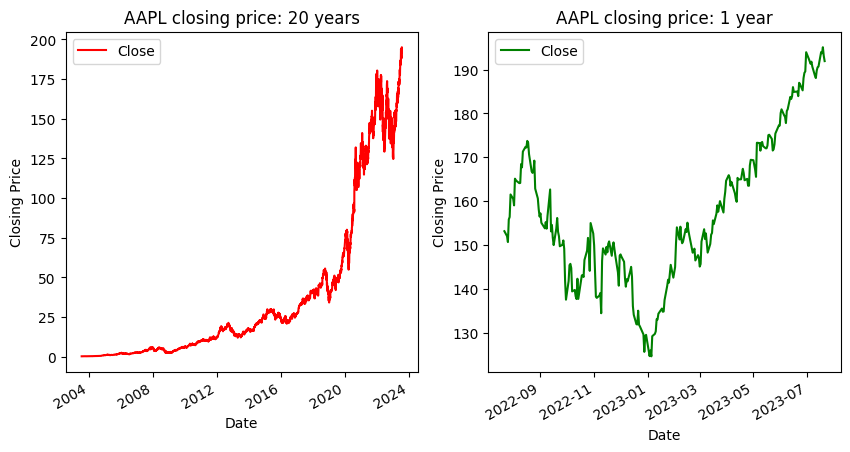

In [37]:
# Creating a subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
# Plotting the closing price against the index of the table.
stock_history.plot.line(y="Close", use_index=True, color='red', ax=axes[0])
axes[0].set_title('{} closing price: 20 years'.format(ticker.upper()))
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Closing Price')
# Plotting the closing price over the past year against the index of the table.
plot2 = one_year_stock.plot.line(y="Close", use_index=True, color='green', ax=axes[1])
axes[1].set_title('{} closing price: 1 year'.format(ticker.upper()))
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Closing Price')
plt.show()


In [38]:
# Removing the dividends and the stock splits columns
stock_history = stock_history.drop(['Dividends','Stock Splits'], axis=1)
# We assume that the stock price at the open of a day is the same as that at the close of the previous day.
stock_history['Tomorrow'] = stock_history["Close"].shift(-1)

                                 Open        High         Low       Close   
Date                                                                        
2003-07-22 00:00:00-04:00    0.316756    0.318122    0.311139    0.315693  \
2003-07-23 00:00:00-04:00    0.317970    0.318122    0.310533    0.315541   
2003-07-24 00:00:00-04:00    0.319335    0.326318    0.309319    0.311292   
2003-07-25 00:00:00-04:00    0.309774    0.327380    0.309622    0.326924   
2003-07-28 00:00:00-04:00    0.326318    0.326318    0.316604    0.318576   
...                               ...         ...         ...         ...   
2023-07-17 00:00:00-04:00  191.899994  194.320007  191.809998  193.990005   
2023-07-18 00:00:00-04:00  193.350006  194.330002  192.419998  193.729996   
2023-07-19 00:00:00-04:00  193.100006  198.229996  192.649994  195.100006   
2023-07-20 00:00:00-04:00  195.089996  196.470001  192.500000  193.130005   
2023-07-21 00:00:00-04:00  194.100006  194.970001  191.229996  191.940002   